# Importing all necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from sklearn import preprocessing
import random # library for random number generation
import matplotlib.pyplot as plt # plotting library
# Set charts to view inline
%matplotlib inline

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



# Read csv file into a dataframe

In [2]:
df = pd.read_csv('2016_neighbourhood_profiles.csv',encoding='latin1')
df.head()

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designat

# Extract Neighbourhood names form dataframe rows

In [4]:
Neighbourhoods = list(df.columns.values)
Neighbourhoods = Neighbourhoods[5:]
print(Neighbourhoods)

['Agincourt North', 'Agincourt South-Malvern West', 'Alderwood', 'Annex', 'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor', 'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park-Nortown', 'Beechborough-Greenbrook', 'Bendale', 'Birchcliffe-Cliffside', 'Black Creek', 'Blake-Jones', 'Briar Hill-Belgravia', 'Bridle Path-Sunnybrook-York Mills', 'Broadview North', 'Brookhaven-Amesbury', 'Cabbagetown-South St. James Town', 'Caledonia-Fairbank', 'Casa Loma', 'Centennial Scarborough', 'Church-Yonge Corridor', 'Clairlea-Birchmount', 'Clanton Park', 'Cliffcrest', 'Corso Italia-Davenport', 'Danforth', 'Danforth East York', 'Don Valley Village', 'Dorset Park', 'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB', 'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley', 'Eglinton East', 'Elms-Old Rexdale', 'Englemount-Lawrence', 'Eringate-Centennial-West Deane', 'Etobicoke West Mall', 'Flemingdon Park', 'Forest Hill North', 'Forest Hill South', 'Glenfield-Jane Heig

# Make a new dataframe with Neighbourhood, Population & Income

In [5]:
dfToronto = pd.DataFrame(index=Neighbourhoods, columns=["Population_2016","Income_2016"])
dfToronto.head()

,Population_2016,Income_2016
Agincourt North,NaN,NaN
Agincourt South-Malvern West,NaN,NaN
Alderwood,NaN,NaN
Annex,NaN,NaN
Banbury-Don Mills,NaN,NaN


# Populate the values in new dataframe from previous dataframe

In [6]:
for index, row in dfToronto.iterrows():
    dfToronto.at[index, 'Population_2016'] = df[index][2]
    dfToronto.at[index, 'Income_2016'] = df[index][2264]

# Convert str to float after removing commas form values

In [7]:
dfToronto['Population_2016']  = dfToronto['Population_2016'] .str.replace(",","").astype(float)
dfToronto['Income_2016']  = dfToronto['Income_2016'] .str.replace(",","").astype(float)

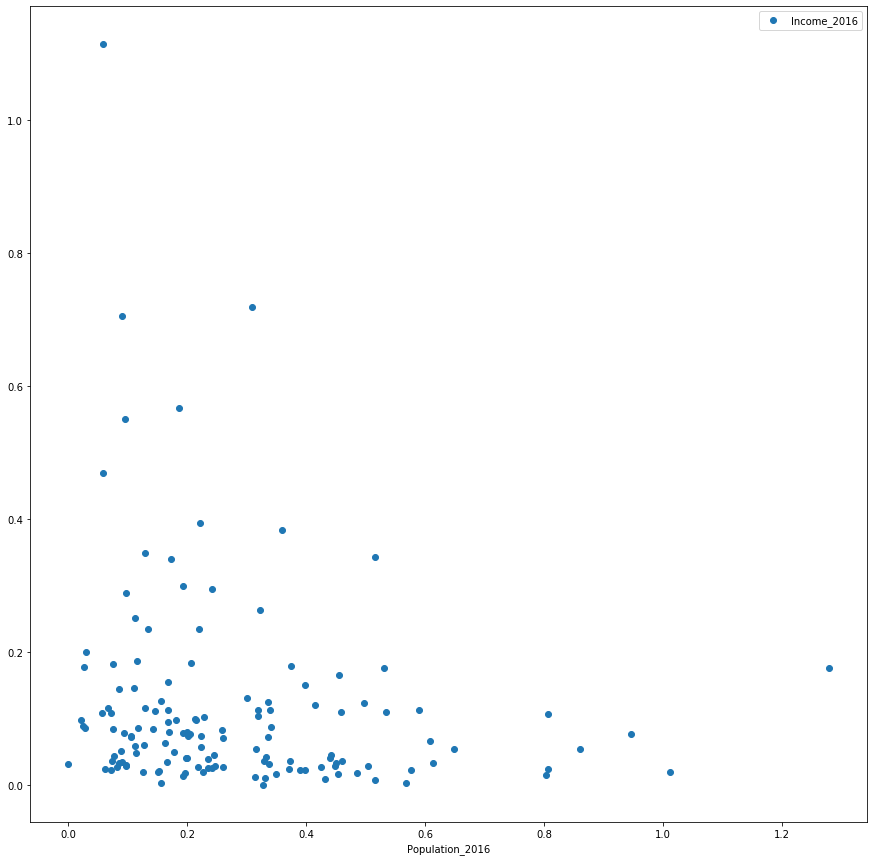

In [11]:
dfToronto.plot(x='Population_2016', y='Income_2016', style='o',figsize = (15,15))

# Normalize data for better understanding

In [9]:
dfToronto['Population_2016'] = (dfToronto['Population_2016'] - dfToronto['Population_2016'].min()) / (dfToronto['Population_2016'].max() - dfToronto['Population_2016'].mean())
dfToronto['Income_2016'] = (dfToronto['Income_2016'] - dfToronto['Income_2016'].min()) / (dfToronto['Income_2016'].max() - dfToronto['Income_2016'].mean())

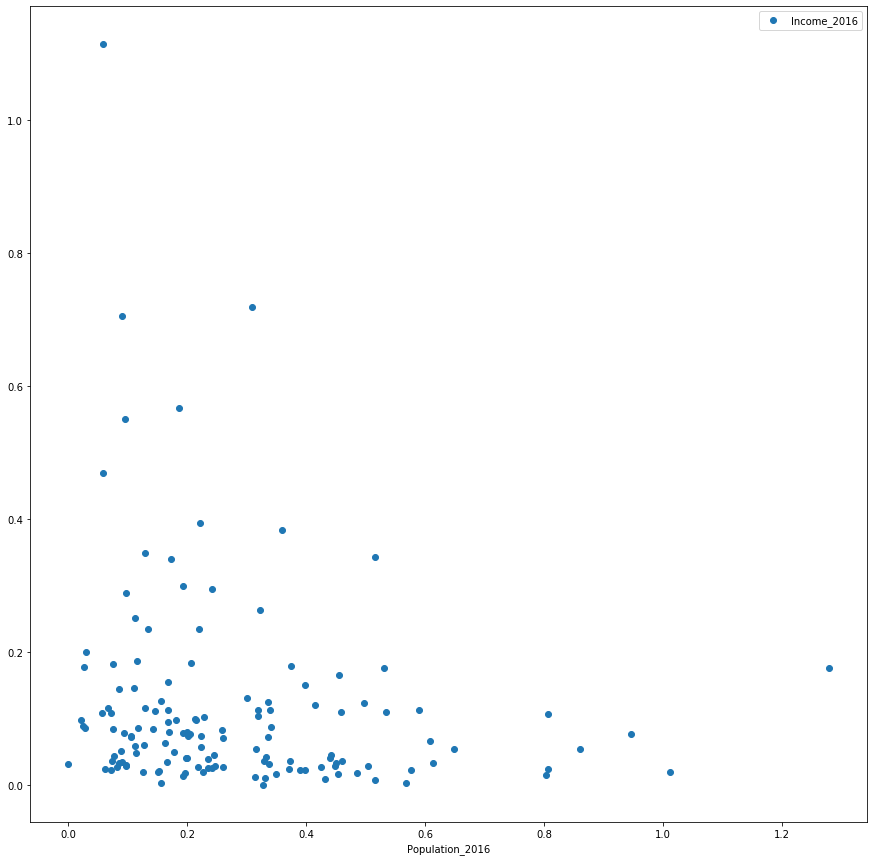

In [10]:
dfToronto.plot(x='Population_2016', y='Income_2016', style='o',figsize = (15,15))

# Define functions for plotting and clusters formation

In [30]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

def plot_points(centroids=None, colors='b', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 15))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['rx', 'rx', 'rx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
           
    plt.scatter(x1, x2, s=20, c=colors)
    
    # define the ticks
    xticks = np.linspace(0, 1.5, 7, endpoint=True)
    yticks = np.linspace(0, 1.5, 7, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=0.25, width=0.25, which='minor', labelsize=10)
    
    # add labels to axes
    ax.set_xlabel('Normalized Population', fontsize=20)
    ax.set_ylabel('Normalized Income', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=20)

    plt.show()

# Plotting with self defined clusters

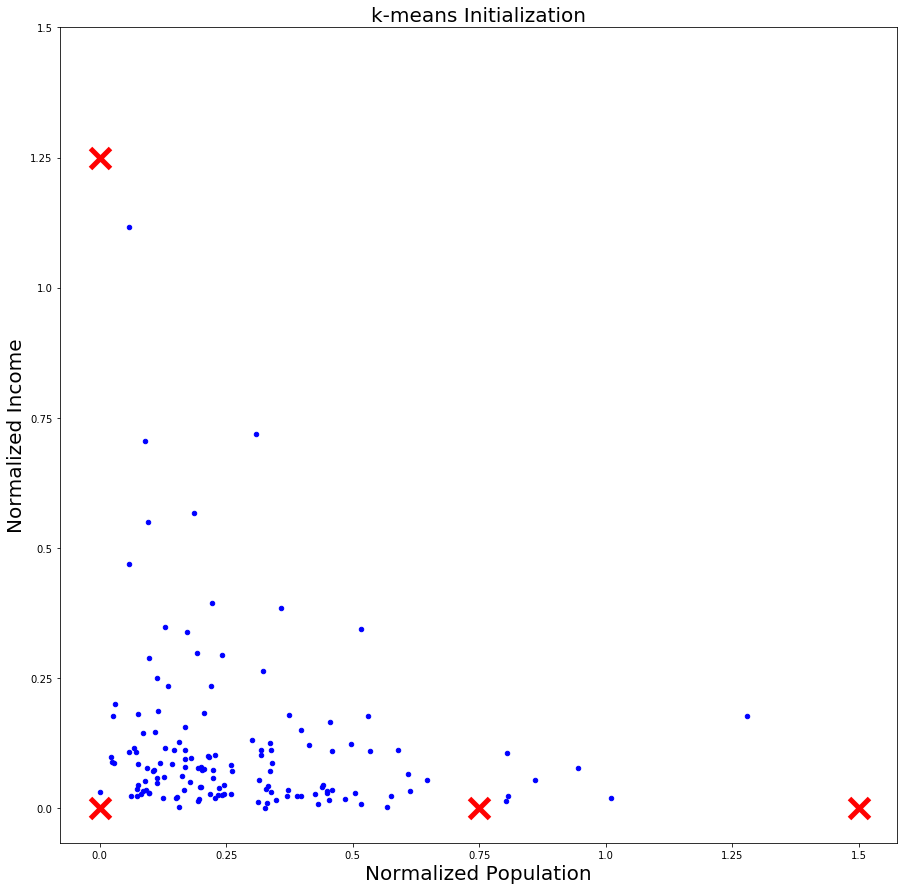

In [31]:
x1 = dfToronto['Population_2016']
x2 = dfToronto['Income_2016']
#plot_points(figure_title='Scatter Plot of Income vs Population')

centers = [[0, 0], [0, 1.25], [0.75,0] , [1.5,0] ]
plot_points(centers, figure_title='k-means Initialization')

# Refining clusters

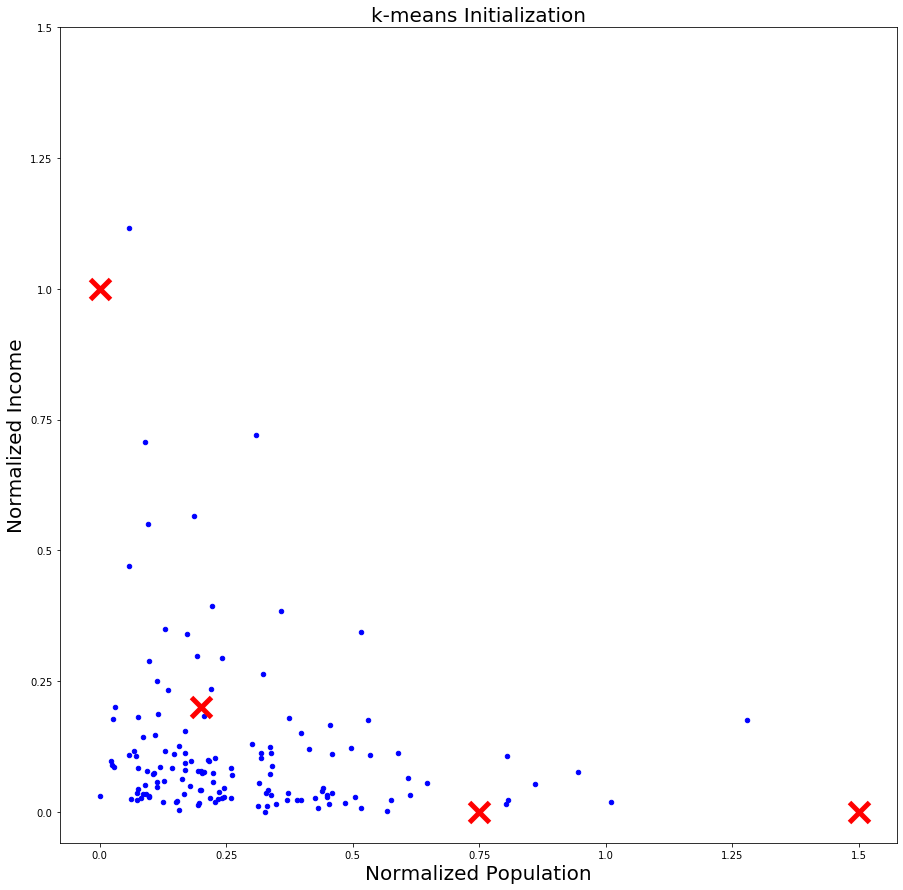

In [32]:
x1 = dfToronto['Population_2016']
x2 = dfToronto['Income_2016']
#plot_points(figure_title='Scatter Plot of Income vs Population')

centers = [[0.2, 0.2], [0, 1], [0.75,0] , [1.5,0] ]
plot_points(centers, figure_title='k-means Initialization')

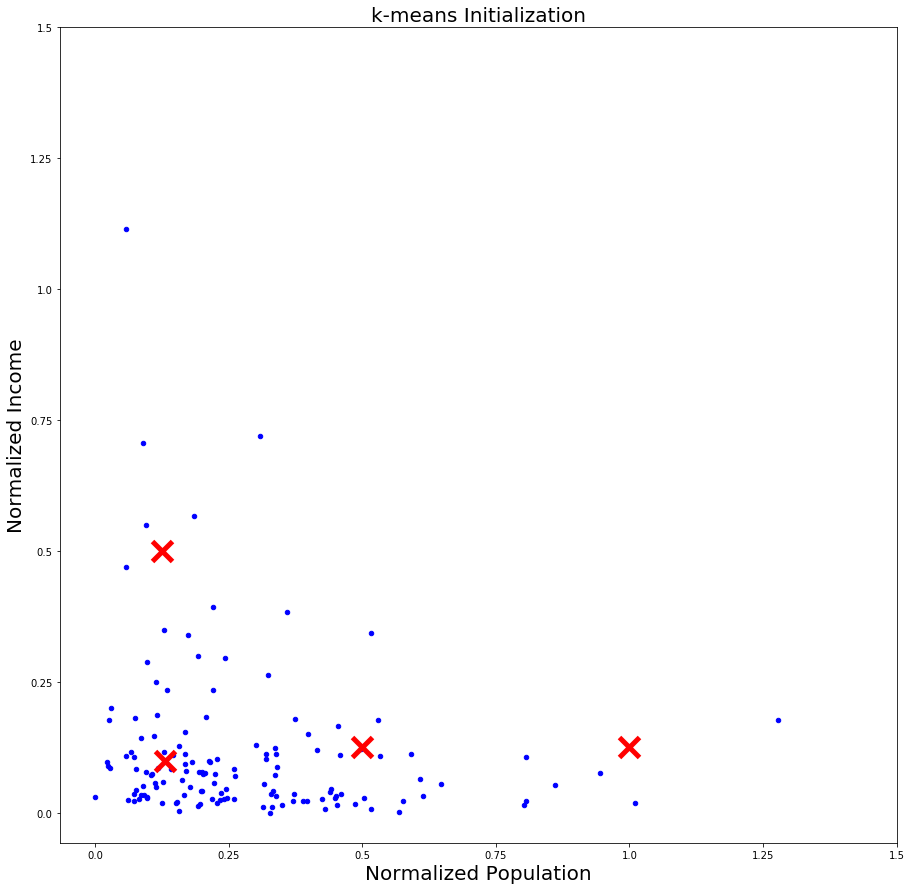

In [33]:
x1 = dfToronto['Population_2016']
x2 = dfToronto['Income_2016']
#plot_points(figure_title='Scatter Plot of Income vs Population')

centers = [[0.130, 0.1], [0.5, 0.125], [0.125,0.5] , [1,0.125] ]
plot_points(centers, figure_title='k-means Initialization')

# We can see the clsuter formation is much better than before. 
#### Neighbourhoods that lie close to cluster (0.5,0.125) will have moderate profit, while those on extremes are not likely to be much profitable.